In [80]:
# !pip install matplotlib pandas scikit-learn seaborn xgboost

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn import manifold
%matplotlib inline

In [82]:
mnist = load_digits()

In [83]:
pixel_values, targets = mnist.data, mnist.target

In [84]:
pixel_values.shape

(1797, 64)

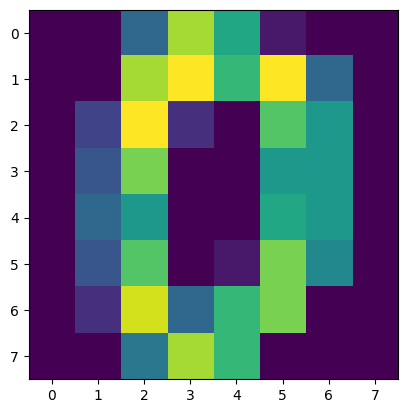

In [85]:
plt.imshow(mnist.images[0])

In [86]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [87]:
transformed_data = tsne.fit_transform(pixel_values)

In [88]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)

In [89]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

<Figure size 1000x1000 with 0 Axes>

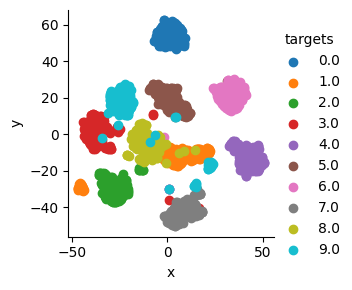

In [90]:
plt.figure(figsize=(10,10))
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()


# Cross validation 

In [91]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [92]:
df = pd.read_csv('datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [94]:
quality_mapping = {
 3: 0,
 4: 0,
 5: 0,
 6: 1,
 7: 1,
 8: 1
}

df["quality"] = df.quality.replace(quality_mapping)

# train test split 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['quality'], axis=1), df['quality'])

In [95]:
# max_depth = 3 case 

clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

train_accuracy = accuracy_score(
 y_train, train_predictions
)

test_accuracy = accuracy_score(
 y_test, test_predictions
)

print(f"train_accuracy -- {train_accuracy}")
print(f'test_accuracy  -- {test_accuracy}')

train_accuracy -- 0.7431192660550459
test_accuracy  -- 0.725


In [96]:
# max_depth = 7 case 

clf = DecisionTreeClassifier(max_depth=7) 
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

train_accuracy = accuracy_score(
 y_train, train_predictions
)

test_accuracy = accuracy_score(
 y_test, test_predictions
)

print(f"train_accuracy -- {train_accuracy}")
print(f'test_accuracy  -- {test_accuracy}')

train_accuracy -- 0.8640533778148457
test_accuracy  -- 0.6875


In [97]:
train_acc = [0.5] 
test_acc = [0.5] 
for ix in range(1,25):
    clf = DecisionTreeClassifier(max_depth=ix) 
    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    train_accuracy = accuracy_score(
    y_train, train_predictions
    )

    train_acc.append(train_accuracy)

    test_accuracy = accuracy_score(
    y_test, test_predictions
    )

    test_acc.append(test_accuracy)


Text(0, 0.5, 'accuracy')

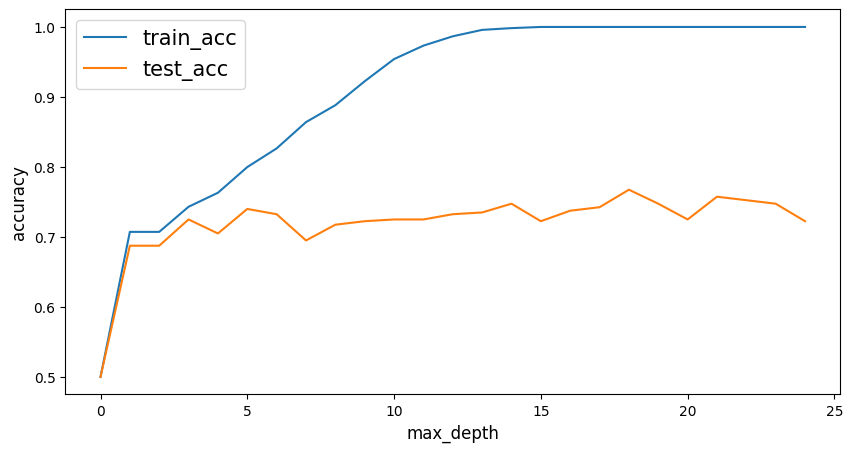

In [98]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='train_acc')
plt.plot(test_acc, label='test_acc')
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=12)
plt.ylabel("accuracy", size=12)

In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [100]:
model = XGBClassifier(n_jobs=-1,
 max_depth=7,
 n_estimators=200)

In [101]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
test_preds = model.predict_proba(X_test)[:, 1]

In [103]:
test_preds[0:5]

array([0.29973745, 0.9483574 , 0.9653909 , 0.01569411, 0.864012  ],
      dtype=float32)

In [104]:
auc = roc_auc_score(y_test, test_preds)
auc

0.888428610880972

# Feature Selection 

In [105]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [107]:
class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        if problem_type == "classification":
            valid_scoring = {
            "f_classif": f_classif,
            "chi2": chi2,
            "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
            "f_regression": f_regression,
            "mutual_info_regression": mutual_info_regression
            }

        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")

    
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                                        valid_scoring[scoring],
                                        k=n_features
                                        )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                                                valid_scoring[scoring],
                                                percentile=int(n_features * 100)
                                                )
        else:
            raise Exception("Invalid type of feature")

    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)

    # same transform function
    def transform(self, X):
        return self.selection.transform(X)

    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [108]:
ufs = UnivariateFeatureSelction(
 n_features=0.1,
 problem_type="classification",
 scoring="f_classif"
)
ufs.fit(X_train, y_train)
X_transformed = ufs.transform(X_train)